In [137]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

Change directory

In [138]:
path = r"C:\Users\frodi\Desktop"
os.chdir(path)

In [139]:
# Load CSVs
VE_1_2024 = pd.read_csv("VE_1_2024")
VE_2_2024 = pd.read_csv("VE_2_2024")
RS_2024 = pd.read_csv("RS_2024")

# Drop unwanted columns
VE_1_2024 = VE_1_2024.drop(columns=["Unnamed: 0"])
VE_2_2024 = VE_2_2024.drop(columns=["Unnamed: 0"])
RS_2024 = RS_2024.drop(columns=["Unnamed: 0"])

# Set "start_time" as index
VE_1_2024.set_index("start_time", inplace=True)
VE_2_2024.set_index("start_time", inplace=True)
RS_2024.set_index("start_time", inplace=True)

# Concatenate horizontally (axis=1) to combine columns side-by-side
pressure_set_points = pd.concat([VE_1_2024, VE_2_2024, RS_2024], axis=1)

# Convert index to datetime
pressure_set_points.index = pd.to_datetime(pressure_set_points.index)
pressure_set_points.sort_index(inplace=True)


# Check the combined DataFrame
pressure_set_points.head()


,VE_1,VE_2,RS
start_time,,,
2024-01-01 01:00:00,9.0,5.60,7.80
2024-01-01 02:00:00,9.0,5.60,7.80
2024-01-01 03:00:00,9.0,5.58,7.80
2024-01-01 04:00:00,9.0,5.55,7.80
2024-01-01 05:00:00,9.0,5.53,7.81


In [140]:
# august_rows = pressure_set_points[pressure_set_points.index.month == 8]
# august_rows.head()
# august_rows.to_csv("test.csv")


In [141]:
august_rows.to_csv("test.csv")

In [142]:
# # Drop rows where the month is August (i.e., month == 8)
pressure_set_points = pressure_set_points[pressure_set_points.index.day != 20]
pressure_set_points = pressure_set_points[pressure_set_points.index.day != 19]
pressure_set_points = pressure_set_points[pressure_set_points.index.day != 21]

# pressure_set_points.head()

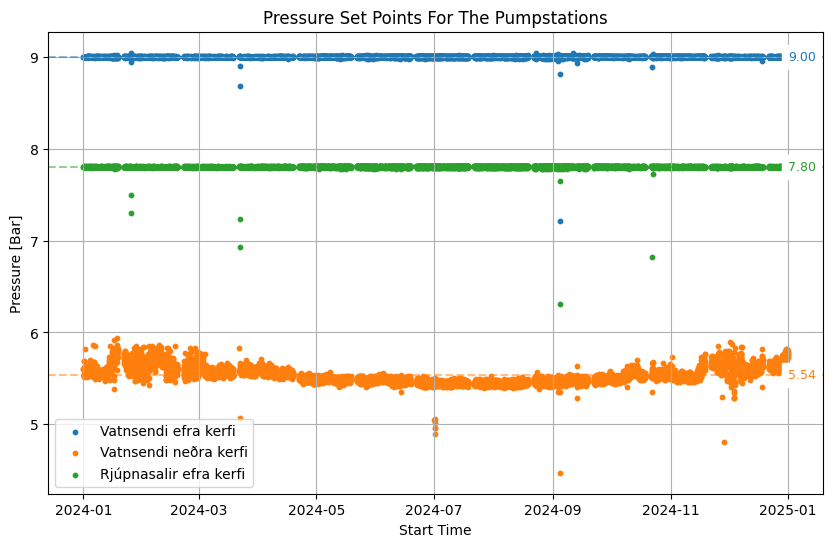

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

pressure_systems = ["Vatnsendi efra kerfi", "Vatnsendi neðra kerfi", "Rjúpnasalir efra kerfi"]
colors = ['C0', 'C1', 'C2']

for col, label, color in zip(pressure_set_points.columns, pressure_systems, colors):
    plt.scatter(pressure_set_points.index, pressure_set_points[col], label=label, s=10, color=color)
    avg = pressure_set_points[col].mean()
    # Draw horizontal average line (optional, comment out if you don't want lines)
    plt.axhline(avg, color=color, linestyle='--', alpha=0.5)
    # Annotate average value near the right end of the plot
    plt.text(pressure_set_points.index[-1], avg, f'{avg:.2f}', color=color,
             va='center', ha='left', fontsize=9, backgroundcolor='white')

plt.xlabel('Start Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure Set Points For The Pumpstations')
plt.legend()
plt.grid(True)
plt.show()
